# Classificação binária

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

In [32]:
df = pd.read_csv('dados_voz_genero.csv')
train, test = train_test_split(df, train_size=0.8)

In [33]:
# selecionando as colunas para utilizar
feature_cols = ['sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 
                'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx']
#tentar normalizar kurt
df.tail()

,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
3163,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,0.200836,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,0.0
3164,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,0.013683,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,0.0
3165,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,0.008006,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,0.0
3166,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,0.212202,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,0.0
3167,0.092884,0.183044,0.070072,0.250827,0.180756,1.705029,5.769115,0.938829,0.601529,0.267702,0.165509,0.185607,0.062257,0.271186,0.227022,0.007812,0.554688,0.546875,0.350000,0.0


In [34]:
X_train = train[feature_cols]
X_test = test[feature_cols]
Y_train = train['label']
Y_test = test['label']

In [35]:
logreg = LogisticRegression(random_state=16, max_iter=1000)
logreg.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, random_state=16)

In [36]:
y_pred = logreg.predict(X_test)

In [37]:
cnf_matrix = metrics.confusion_matrix(Y_test, y_pred)
cnf_matrix

array([[285,  39],
       [  9, 301]], dtype=int64)

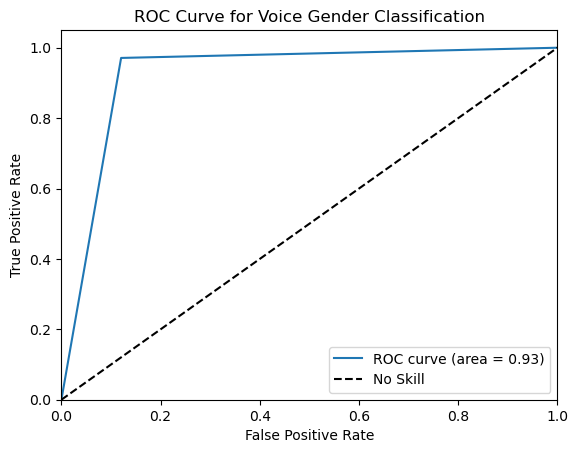

In [38]:
#ROC
fp_rate, tp_rate, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(fp_rate, tp_rate)
#plot
plt.figure()
plt.plot(fp_rate, tp_rate, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Voice Gender Classification')
plt.legend()
plt.show()

In [39]:
#CALCULAR F1 SCORE PARA AVALIAR O MODELO - FALTA THRESHOLD
tp = cnf_matrix[0][0]
fp = cnf_matrix[0][1]
fn = cnf_matrix[1][0]
#precision = true_positives/(true_positives+false_positives)
precision = tp/(tp+fp)
print(f"Precision: {precision}")
#recall = true_positives/(true_positives+false_negatives)
recall = tp/(tp+fp)
print(f"Recall: {recall}")
#f1_score = 2*precision*recall/(precision+recall)
f1 = 2*precision*recall/(precision+recall)
print(f"f1 score: {f1}")

Precision: 0.8796296296296297
Recall: 0.8796296296296297
f1 score: 0.8796296296296297


# Classificação multi-classe

In [53]:
#Treino
with open('./train/X_train.txt', 'r') as file:
    lines = file.readlines()
data_x = [line.strip().split() for line in lines]
X_train = pd.DataFrame(data_x)
X_train_arr = np.array(X_train)

with open('./train/y_train.txt', 'r') as file:
    lines = file.readlines()
data_y = [line.strip().split() for line in lines]
y_train = pd.DataFrame(data_y)
y_train_arr = np.array(y_train)

#Teste
with open('./test/X_test.txt', 'r') as file:
    lines = file.readlines()
data_x = [line.strip().split() for line in lines]
X_test = pd.DataFrame(data_x)

with open('./test/y_test.txt', 'r') as file:
    lines = file.readlines()
data_y = [line.strip().split() for line in lines]
y_test = pd.DataFrame(data_y)
y_test_arr = y_test.values.ravel()

In [54]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,2.8858451e-001,-2.0294171e-002,-1.3290514e-001,-9.9527860e-001,-9.8311061e-001,-9.1352645e-001,-9.9511208e-001,-9.8318457e-001,-9.2352702e-001,-9.3472378e-001,...,-7.4323027e-002,-2.9867637e-001,-7.1030407e-001,-1.1275434e-001,3.0400372e-002,-4.6476139e-001,-1.8445884e-002,-8.4124676e-001,1.7994061e-001,-5.8626924e-002
1,2.7841883e-001,-1.6410568e-002,-1.2352019e-001,-9.9824528e-001,-9.7530022e-001,-9.6032199e-001,-9.9880719e-001,-9.7491437e-001,-9.5768622e-001,-9.4306751e-001,...,1.5807454e-001,-5.9505094e-001,-8.6149931e-001,5.3476955e-002,-7.4345661e-003,-7.3262621e-001,7.0351059e-001,-8.4478760e-001,1.8028889e-001,-5.4316717e-002
2,2.7965306e-001,-1.9467156e-002,-1.1346169e-001,-9.9537956e-001,-9.6718701e-001,-9.7894396e-001,-9.9651994e-001,-9.6366837e-001,-9.7746859e-001,-9.3869155e-001,...,4.1450281e-001,-3.9074815e-001,-7.6010372e-001,-1.1855926e-001,1.7789948e-001,1.0069921e-001,8.0852908e-001,-8.4893347e-001,1.8063731e-001,-4.9117815e-002
3,2.7917394e-001,-2.6200646e-002,-1.2328257e-001,-9.9609149e-001,-9.8340270e-001,-9.9067510e-001,-9.9709947e-001,-9.8274984e-001,-9.8930250e-001,-9.3869155e-001,...,4.0457253e-001,-1.1729020e-001,-4.8284451e-001,-3.6787973e-002,-1.2892494e-002,6.4001104e-001,-4.8536645e-001,-8.4864938e-001,1.8193476e-001,-4.7663183e-002
4,2.7662877e-001,-1.6569655e-002,-1.1536185e-001,-9.9813862e-001,-9.8081727e-001,-9.9048163e-001,-9.9832113e-001,-9.7967187e-001,-9.9044113e-001,-9.4246912e-001,...,8.7753013e-002,-3.5147093e-001,-6.9920515e-001,1.2332005e-001,1.2254196e-001,6.9357829e-001,-6.1597061e-001,-8.4786525e-001,1.8515116e-001,-4.3892254e-002


In [58]:
classes = np.unique(y_train_arr)
len(classes)

6

In [55]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, f1_score

In [59]:
model = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=200)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
f1_scorer = make_scorer(f1_score, average='weighted')

best_f1_score = 0
best_model = None
for fold, (train_index, test_index) in enumerate(kfold.split(X_train_arr)):
    X, X_val = X_train_arr[train_index], X_train_arr[test_index]
    y, y_val = y_train_arr[train_index], y_train_arr[test_index]

    model.fit(X, y)
    y_pred = model.predict(X_val)
    f1 = f1_score(y_val, y_pred, average='weighted')
#     print(f"F1 score: {f1}")
    
    if(f1 > best_f1_score):
        best_f1_score = f1
        best_model = model

print(f"Best f1_score: {best_f1_score}")

C:\Users\Mariano Cho\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Mariano Cho\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Mariano Cho\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

Best f1_score: 0.9863945578231292


Optei por utilizar a função softmax, pois para esse tanto de classe, o one vs all poderia demorar muito.

In [ ]:
y_test_pred = best_model.predict(X_test)